In [10]:
import re
pattern = r"foo|foot"
reobject = re.compile(pattern)
result = reobject.match("barefoot")
print(result)

None


In [9]:
result = re.findall(r"foot|foo", "barefoot foo foot")
print(result)

['foot', 'foo', 'foot']


In [86]:
import re
patron = re.compile(r"[aeiou]+[^aeiou ,.]{2,}")
with open("texto_ejemplo.txt") as open_file:
    data = open_file.read()
    print(patron.findall(data))

['ips', 'ons', 'ect', 'isc', 'ing', 'ulv', 'urn', 'itt', 'itt', 'est', 'unc', 'err', 'and', 'ull', 'agn', 'ell', 'ent', 'esq', 'ons', 'ect', 'onc', 'itt', 'ort', 'end', 'and', 'itt', 'ign', 'iss', 'inc', 'unt', 'isq', 'ips', 'urs', 'ull', 'amc', 'orp', 'est', 'urs', 'ell', 'ulp', 'ultr', 'est', 'ist', 'agn', 'orc', 'utr', 'ulv', 'utr', 'agn', 'ent', 'ong', 'emp', 'ull', 'inc', 'unt', 'utp', 'ortt', 'uct', 'urs', 'ulp', 'unc', 'ond', 'ent', 'ort', 'euism', 'ull', 'imp', 'erd', 'ust', 'ull', 'amc', 'orp', 'ass', 'est', 'unc', 'ort', 'ell', 'ent', 'esq', 'agn', 'emp', 'onv', 'all', 'ull', 'ull', 'amc', 'orp', 'unc', 'ell', 'ent', 'esq', 'emp', 'int', 'erd', 'ort', 'endr', 'euism', 'ull', 'ips', 'ons', 'ect', 'isc', 'ing', 'orb', 'ing', 'ill', 'ent', 'usc', 'ibh', 'orc', 'end', 'ibh', 'uct', 'uct', 'ict', 'euism', 'onv', 'all', 'isl', 'uisq', 'ons', 'ant', 'ull', 'amc', 'orp', 'ist', 'urs', 'ell', 'ent', 'esq', 'urp', 'ist', 'eff', 'orn', 'ips', 'ons', 'ect', 'isc', 'ing', 'ull', 'end', 'o

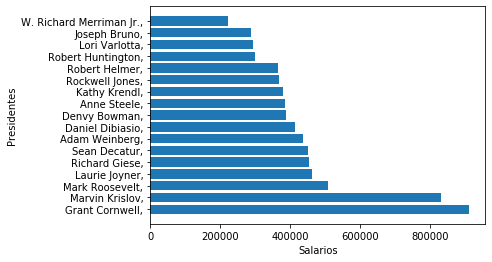

In [59]:
import re
import requests
r = requests.get('https://bit.ly/2ntSh2C')
c = r.content #Extraer el contenido
from bs4 import BeautifulSoup #Libreria para Scraping html y xml
soup = BeautifulSoup(c, 'html.parser')

#Buscando la lista de elementos que nos interesa
list_li = soup.find('div', attrs = {'class': 'entry-content'}).find("ul").find_all("li")
list_text = list(map(lambda item: item.text, list_li))

# Creando regex para nombre de presidente
name_pattern = re.compile(r"^([A-Z]{1}.+?),")
names = list(map(lambda item: name_pattern.search(item).group(), list_text))

# Regex para escuela y salario
school_pattern = re.compile(r"(?:,|,\s)([A-Z]{1}.*?)(?:\s\(|:|,)")
schools = list(map(lambda item: school_pattern.search(item).group(1), list_text))# Pattern to match the salaries
salary_pattern = re.compile(r'\$.+')
salaries = list(map(lambda item: salary_pattern.search(item).group(), list_text))
salaries = [int("".join(s[1:].split(","))) for s in salaries]

import matplotlib.pyplot as plt
plt.barh(names, salaries)
plt.xlabel('Salarios')
plt.ylabel('Presidentes')
plt.show()